In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
import sklearn.metrics

In [366]:
df_train = pd.read_csv('Traveldata_train.csv')
df_test = pd.read_csv('Traveldata_test.csv')

In [367]:
df_train.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [368]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [369]:
df_train.isnull().sum()

ID                           0
Gender                      77
CustomerType              8951
Age                         33
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

In [370]:
df_train.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [371]:
dups = df_train.duplicated()

In [372]:
dups.sum()

0

In [373]:
mean = df_train['Age'].mean()

In [374]:
df_train['Age'].replace(np.NaN,mean,inplace=True)

In [375]:
df_train[df_train['DepartureDelay_in_Mins'].isnull()]

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
2428,98802429,NaN,NaN,26.0,Business travel,Business,2229,NaN,NaN
3779,98803780,NaN,NaN,21.0,Business travel,Eco,2311,NaN,NaN
3929,98803930,NaN,NaN,31.0,Personal Travel,Eco,2958,NaN,NaN
4255,98804256,Female,Loyal Customer,32.0,Personal Travel,Eco,1289,NaN,NaN
5636,98805637,NaN,NaN,60.0,Business travel,Business,3617,NaN,NaN
5792,98805793,NaN,NaN,32.0,Business travel,Business,1639,NaN,NaN
11990,98811991,NaN,NaN,55.0,Business travel,Business,2260,NaN,NaN
12176,98812177,Female,Loyal Customer,28.0,Personal Travel,Eco,2082,NaN,NaN
14016,98814017,Female,Loyal Customer,45.0,NaN,Business,2131,NaN,NaN
16397,98816398,NaN,NaN,55.0,Business travel,Business,1775,NaN,NaN


<AxesSubplot:xlabel='DepartureDelay_in_Mins'>

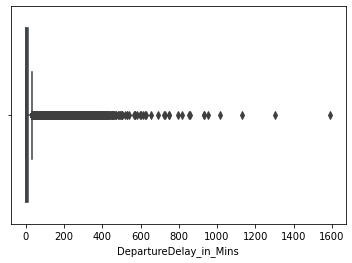

In [376]:
sns.boxplot(x= df_train['DepartureDelay_in_Mins'],data= df_train)

In [377]:
median1 = df_train['DepartureDelay_in_Mins'].median()

In [378]:
df_train['DepartureDelay_in_Mins'].replace(np.NaN,median1,inplace=True)

In [379]:
df_train['DepartureDelay_in_Mins'].isnull().sum()

0

In [380]:
df_train[df_train['ArrivalDelay_in_Mins'].isnull()]

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
230,98800231,Male,NaN,27.0,Business travel,Business,4943,181.0,NaN
231,98800232,Female,Loyal Customer,24.0,Personal Travel,Eco,1711,10.0,NaN
265,98800266,Female,NaN,37.0,Business travel,Business,4019,0.0,NaN
418,98800419,Male,Loyal Customer,58.0,Business travel,Eco,2399,0.0,NaN
475,98800476,Female,NaN,39.0,Business travel,Business,2505,0.0,NaN
...,...,...,...,...,...,...,...,...,...
93293,98893294,Female,Loyal Customer,9.0,Personal Travel,Eco,1190,16.0,NaN
93837,98893838,Female,Loyal Customer,35.0,Business travel,Eco,1749,55.0,NaN
93918,98893919,Female,disloyal Customer,15.0,Business travel,Eco,2275,58.0,NaN
93987,98893988,Male,Loyal Customer,63.0,Personal Travel,Eco,1711,64.0,NaN


In [381]:
median2 = df_train['ArrivalDelay_in_Mins'].median()

In [382]:
df_train['ArrivalDelay_in_Mins'].replace(np.NaN,median2,inplace=True)

In [383]:
df_train['ArrivalDelay_in_Mins'].isnull().sum()

0

In [384]:
df_train['Gender'].value_counts()

Female    47815
Male      46487
Name: Gender, dtype: int64

In [38]:
mode1 = df_train['Gender'].mode().values[0]

In [36]:
df_train['CustomerType'].value_counts()

Loyal Customer       69823
disloyal Customer    15605
Name: CustomerType, dtype: int64

In [39]:
mode2 = df_train['CustomerType'].mode().values[0]

In [40]:
df_train['TypeTravel'].value_counts()

Business travel    58617
Personal Travel    26536
Name: TypeTravel, dtype: int64

In [385]:
df_train.loc[df_train['Gender'].isnull() == True,'Gender'] = df_train['Gender'].mode()[0]
df_train.loc[df_train['CustomerType'].isnull() == True,'CustomerType'] = df_train['CustomerType'].mode()[0]
df_train.loc[df_train['TypeTravel'].isnull() == True,'TypeTravel'] = df_train['TypeTravel'].mode()[0]

In [386]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94379 non-null  object 
 2   CustomerType            94379 non-null  object 
 3   Age                     94379 non-null  float64
 4   TypeTravel              94379 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94379 non-null  float64
 8   ArrivalDelay_in_Mins    94379 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [387]:
df_train = pd.get_dummies(df_train,drop_first=True)

In [388]:
df_train.head()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Eco
0,98800001,52.0,272,0.0,5.0,0,0,0,0
1,98800002,48.0,2200,9.0,0.0,1,0,1,1
2,98800003,43.0,1061,77.0,119.0,0,0,0,0
3,98800004,44.0,780,13.0,18.0,0,0,0,0
4,98800005,50.0,1981,0.0,0.0,0,0,0,0


In [389]:
df_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [390]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35572 non-null  object 
 2   CustomerType            32219 non-null  object 
 3   Age                     35591 non-null  float64
 4   TypeTravel              32154 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35573 non-null  float64
 8   ArrivalDelay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [391]:
df_test.isnull().sum()

ID                           0
Gender                      30
CustomerType              3383
Age                         11
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      29
ArrivalDelay_in_Mins       123
dtype: int64

In [392]:
df_test.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,3.560200e+04,35591.000000,35602.000000,35573.000000,35479.000000
mean,9.991780e+07,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.137554,1024.308863,37.895453,38.531293
min,9.990000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.990890e+07,27.000000,1360.000000,0.000000,0.000000
50%,9.991780e+07,40.000000,1929.000000,0.000000,0.000000
75%,9.992670e+07,51.000000,2559.000000,13.000000,13.000000
max,9.993560e+07,85.000000,6868.000000,978.000000,970.000000


In [393]:
dups = df_test.duplicated()

In [394]:
dups.sum()

0

In [395]:
df_test[df_test['Age'].isnull()]

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
3542,99903543,Male,Loyal Customer,NaN,NaN,Business,4090,10.0,5.0
4200,99904201,Male,disloyal Customer,NaN,NaN,Eco,2013,0.0,0.0
8996,99908997,Male,disloyal Customer,NaN,NaN,Business,2413,3.0,0.0
9963,99909964,Female,Loyal Customer,NaN,NaN,Eco,414,0.0,0.0
12861,99912862,Female,Loyal Customer,NaN,NaN,Eco,899,100.0,120.0
14272,99914273,Female,Loyal Customer,NaN,NaN,Eco,2240,30.0,25.0
14560,99914561,Male,Loyal Customer,NaN,NaN,Business,432,70.0,56.0
21511,99921512,Male,Loyal Customer,NaN,NaN,Business,1831,0.0,0.0
30617,99930618,Male,Loyal Customer,NaN,NaN,Eco,2784,99.0,NaN
30844,99930845,Male,Loyal Customer,NaN,NaN,Eco,2095,0.0,0.0


In [396]:
mean = df_test['Age'].mean()

In [397]:
df_test['Age'].replace(np.NaN,mean,inplace=True)

In [398]:
df_test[df_test['DepartureDelay_in_Mins'].isnull()]

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
294,99900295,Male,Loyal Customer,39.0,Business travel,Business,1275,NaN,NaN
2111,99902112,NaN,NaN,65.0,Personal Travel,Eco,2587,NaN,NaN
3278,99903279,NaN,NaN,68.0,NaN,Business,3768,NaN,NaN
4038,99904039,Male,disloyal Customer,36.0,Business travel,Business,2399,NaN,NaN
4060,99904061,Female,Loyal Customer,60.0,Business travel,Business,3200,NaN,NaN
5434,99905435,NaN,NaN,62.0,Business travel,Eco,565,NaN,NaN
8073,99908074,Male,disloyal Customer,36.0,NaN,Eco,1619,NaN,NaN
8218,99908219,NaN,NaN,9.0,Personal Travel,Eco,1541,NaN,NaN
8451,99908452,Male,Loyal Customer,37.0,Business travel,Eco,2483,NaN,NaN
12297,99912298,Female,Loyal Customer,31.0,Business travel,Business,3561,NaN,NaN


In [399]:
median1 = df_test['DepartureDelay_in_Mins'].median()

In [400]:
df_test['DepartureDelay_in_Mins'].replace(np.NaN,median1,inplace=True)

In [401]:
median2 = df_test['ArrivalDelay_in_Mins'].median()

In [402]:
df_test['ArrivalDelay_in_Mins'].replace(np.NaN,median2,inplace=True)

In [403]:
df_test.loc[df_test['Gender'].isnull() == True,'Gender'] = df_test['Gender'].mode()[0]
df_test.loc[df_test['CustomerType'].isnull() == True,'CustomerType'] = df_test['CustomerType'].mode()[0]
df_test.loc[df_test['TypeTravel'].isnull() == True,'TypeTravel'] = df_test['TypeTravel'].mode()[0]

In [404]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35602 non-null  object 
 2   CustomerType            35602 non-null  object 
 3   Age                     35602 non-null  float64
 4   TypeTravel              35602 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35602 non-null  float64
 8   ArrivalDelay_in_Mins    35602 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [405]:
df_test = pd.get_dummies(df_test,drop_first=True)

In [406]:
df_test.head()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Eco
0,99900001,36.0,532,0.0,0.0,0,0,0,0
1,99900002,21.0,1425,9.0,28.0,0,1,0,0
2,99900003,60.0,2832,0.0,0.0,1,0,0,0
3,99900004,29.0,1352,0.0,0.0,0,0,1,1
4,99900005,18.0,1610,17.0,0.0,1,1,0,0


In [407]:
Xtrain = df_train.drop(columns='CustomerType_disloyal Customer',axis=1)
ytrain = df_train.pop('CustomerType_disloyal Customer')

In [408]:
Xtrain.head()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Gender_Male,TypeTravel_Personal Travel,Travel_Class_Eco
0,98800001,52.0,272,0.0,5.0,0,0,0
1,98800002,48.0,2200,9.0,0.0,1,1,1
2,98800003,43.0,1061,77.0,119.0,0,0,0
3,98800004,44.0,780,13.0,18.0,0,0,0
4,98800005,50.0,1981,0.0,0.0,0,0,0


In [409]:
ytrain.head()

0    0
1    0
2    0
3    0
4    0
Name: CustomerType_disloyal Customer, dtype: uint8

In [2]:
Xtest = df_test.drop(columns='CustomerType_disloyal Customer',axis=1)
ytest = df_test.pop('CustomerType_disloyal Customer')

NameError: name 'df_test' is not defined

In [411]:
from sklearn.tree import DecisionTreeClassifier

In [412]:
dt_model = DecisionTreeClassifier()

In [413]:
dt_model.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [50]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(Xtrain), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [414]:
from sklearn import metrics

In [415]:
ytrain_predict = dt_model.predict(Xtrain)
ytest_predict = dt_model.predict(Xtest)

In [416]:
dt_acc_train = metrics.accuracy_score(ytrain,ytrain_predict)
dt_acc_test = metrics.accuracy_score(ytest,ytest_predict)
print(dt_acc_train)
print(dt_acc_test)

1.0
0.7760799955058705


In [417]:
from sklearn.ensemble import RandomForestClassifier

In [418]:
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10,max_features=3)

In [419]:
rf_model.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=10)

In [420]:
ytrain_predict = rf_model.predict(Xtrain)
ytest_predict = rf_model.predict(Xtest)

In [421]:
rf_acc_train = metrics.accuracy_score(ytrain,ytrain_predict)
rf_acc_test = metrics.accuracy_score(ytest,ytest_predict)
print(rf_acc_train)
print(rf_acc_test)

0.8785428961951282
0.8728442222347059


In [422]:
rf_roc_train = metrics.roc_auc_score(ytrain,ytrain_predict)
rf_roc_test = metrics.roc_auc_score(ytest, ytest_predict)
print(rf_roc_train)
print(rf_roc_test)
print(metrics.confusion_matrix(ytest,ytest_predict))
rf_clr_train = metrics.classification_report(ytrain,ytrain_predict)
rf_clr_test = metrics.classification_report(ytest,ytest_predict)
print(rf_clr_train)
print(rf_clr_test)

0.730041762974977
0.7305422306391384
[[28033  1699]
 [ 2828  3042]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     78774
           1       0.68      0.51      0.58     15605

    accuracy                           0.88     94379
   macro avg       0.79      0.73      0.75     94379
weighted avg       0.87      0.88      0.87     94379

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     29732
           1       0.64      0.52      0.57      5870

    accuracy                           0.87     35602
   macro avg       0.78      0.73      0.75     35602
weighted avg       0.86      0.87      0.87     35602



In [423]:
final_predictions = rf_model.predict(Xtest)

In [424]:
final_predictions.shape

(35602,)

In [425]:
test_file_ids = Xtest['ID']

In [426]:
submission2 = pd.DataFrame([test_file_ids,final_predictions]).T

In [427]:
submission2.rename(columns={'Unnamed 0':'CustomerType_disloyal Customer'},inplace=True)

In [429]:
submission2.to_csv('submission2.csv',index=False)

In [28]:
df_train1 = pd.read_csv('Surveydata_train.csv')
df_test1 = pd.read_csv('Surveydata_test.csv')

In [29]:
df_train1.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [30]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

In [31]:
df_train1.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [32]:
df_train1[df_train1['Seat_comfort'].isnull()]

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
560,98800561,0,NaN,Green Car,NaN,good,need improvement,good,good,good,good,need improvement,good,acceptable,poor,acceptable,good
2214,98802215,1,NaN,Green Car,NaN,poor,manageable,good,good,good,good,NaN,NaN,NaN,good,excellent,good
4754,98804755,0,NaN,Ordinary,NaN,need improvement,manageable,excellent,need improvement,poor,excellent,NaN,NaN,NaN,excellent,good,excellent
5191,98805192,1,NaN,Green Car,NaN,acceptable,manageable,good,good,good,good,acceptable,excellent,good,good,acceptable,good
8809,98808810,1,NaN,Green Car,NaN,acceptable,manageable,good,good,good,need improvement,need improvement,need improvement,need improvement,acceptable,need improvement,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86883,98886884,0,NaN,Green Car,NaN,acceptable,manageable,need improvement,acceptable,need improvement,need improvement,good,acceptable,need improvement,good,good,need improvement
87693,98887694,0,NaN,Green Car,NaN,excellent,very convinient,need improvement,need improvement,need improvement,need improvement,NaN,NaN,NaN,acceptable,acceptable,need improvement
88765,98888766,0,NaN,Green Car,NaN,acceptable,Convinient,need improvement,acceptable,poor,need improvement,NaN,NaN,NaN,need improvement,acceptable,need improvement
90800,98890801,0,NaN,Ordinary,NaN,excellent,need improvement,acceptable,acceptable,acceptable,acceptable,NaN,excellent,acceptable,acceptable,good,acceptable


In [33]:
df_train1.loc[df_train1['Seat_comfort'].isnull() == True,'Seat_comfort'] = df_train1['Seat_comfort'].mode()[0]
df_train1.loc[df_train1['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df_train1['Arrival_time_convenient'].mode()[0]
df_train1.loc[df_train1['Catering'].isnull() == True,'Catering'] = df_train1['Catering'].mode()[0]
df_train1.loc[df_train1['Platform_location'].isnull() == True,'Platform_location'] = df_train1['Platform_location'].mode()[0]
df_train1.loc[df_train1['Onboardwifi_service'].isnull() == True,'Onboardwifi_service'] = df_train1['Onboardwifi_service'].mode()[0]
df_train1.loc[df_train1['Onboard_entertainment'].isnull() == True,'Onboard_entertainment'] = df_train1['Onboard_entertainment'].mode()[0]
df_train1.loc[df_train1['Online_support'].isnull() == True,'Online_support'] = df_train1['Online_support'].mode()[0]
df_train1.loc[df_train1['Onlinebooking_Ease'].isnull() == True,'Onlinebooking_Ease'] = df_train1['Onlinebooking_Ease'].mode()[0]
df_train1.loc[df_train1['Onboard_service'].isnull() == True,'Onboard_service'] = df_train1['Onboard_service'].mode()[0]
df_train1.loc[df_train1['Leg_room'].isnull() == True,'Leg_room'] = df_train1['Leg_room'].mode()[0]
df_train1.loc[df_train1['Baggage_handling'].isnull() == True,'Baggage_handling'] = df_train1['Baggage_handling'].mode()[0]
df_train1.loc[df_train1['Checkin_service'].isnull() == True,'Checkin_service'] = df_train1['Checkin_service'].mode()[0]
df_train1.loc[df_train1['Cleanliness'].isnull() == True,'Cleanliness'] = df_train1['Cleanliness'].mode()[0]
df_train1.loc[df_train1['Online_boarding'].isnull() == True,'Online_boarding'] = df_train1['Online_boarding'].mode()[0]


In [34]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94379 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  94379 non-null  object
 5   Catering                 94379 non-null  object
 6   Platform_location        94379 non-null  object
 7   Onboardwifi_service      94379 non-null  object
 8   Onboard_entertainment    94379 non-null  object
 9   Online_support           94379 non-null  object
 10  Onlinebooking_Ease       94379 non-null  object
 11  Onboard_service          94379 non-null  object
 12  Leg_room                 94379 non-null  object
 13  Baggage_handling         94379 non-null  object
 14  Checkin_service          94379 non-nul

In [35]:
df_train1['Seat_comfort'] = np.where(df_train1['Seat_comfort']=='extremely poor',0,df_train1['Seat_comfort'])
df_train1['Seat_comfort'] = np.where(df_train1['Seat_comfort']=='poor',1,df_train1['Seat_comfort'])
df_train1['Seat_comfort'] = np.where(df_train1['Seat_comfort']=='need improvement',2,df_train1['Seat_comfort'])
df_train1['Seat_comfort'] = np.where(df_train1['Seat_comfort']=='acceptable',3,df_train1['Seat_comfort'])
df_train1['Seat_comfort'] = np.where(df_train1['Seat_comfort']=='good',4,df_train1['Seat_comfort'])
df_train1['Seat_comfort'] = np.where(df_train1['Seat_comfort']=='excellent',5,df_train1['Seat_comfort'])

df_train1['Arrival_time_convenient'] = np.where(df_train1['Arrival_time_convenient']=='extremely poor',0,df_train1['Arrival_time_convenient'])
df_train1['Arrival_time_convenient'] = np.where(df_train1['Arrival_time_convenient']=='poor',1,df_train1['Arrival_time_convenient'])
df_train1['Arrival_time_convenient'] = np.where(df_train1['Arrival_time_convenient']=='need improvement',2,df_train1['Arrival_time_convenient'])
df_train1['Arrival_time_convenient'] = np.where(df_train1['Arrival_time_convenient']=='acceptable',3,df_train1['Arrival_time_convenient'])
df_train1['Arrival_time_convenient'] = np.where(df_train1['Arrival_time_convenient']=='good',4,df_train1['Arrival_time_convenient'])
df_train1['Arrival_time_convenient'] = np.where(df_train1['Arrival_time_convenient']=='excellent',5,df_train1['Arrival_time_convenient'])

df_train1['Catering'] = np.where(df_train1['Catering']=='extremely poor',0,df_train1['Catering'])
df_train1['Catering'] = np.where(df_train1['Catering']=='poor',1,df_train1['Seat_comfort'])
df_train1['Catering'] = np.where(df_train1['Catering']=='need improvement',2,df_train1['Catering'])
df_train1['Catering'] = np.where(df_train1['Catering']=='acceptable',3,df_train1['Catering'])
df_train1['Catering'] = np.where(df_train1['Catering']=='good',4,df_train1['Catering'])
df_train1['Catering'] = np.where(df_train1['Catering']=='excellent',5,df_train1['Catering'])

df_train1['Platform_location'] = np.where(df_train1['Platform_location']=='very inconvinient',0,df_train1['Platform_location'])
df_train1['Platform_location'] = np.where(df_train1['Platform_location']=='Inconvinient',1,df_train1['Platform_location'])
df_train1['Platform_location'] = np.where(df_train1['Platform_location']=='need improvement',2,df_train1['Platform_location'])
df_train1['Platform_location'] = np.where(df_train1['Platform_location']=='manageable',3,df_train1['Platform_location'])
df_train1['Platform_location'] = np.where(df_train1['Platform_location']=='Convinient',4,df_train1['Platform_location'])
df_train1['Platform_location'] = np.where(df_train1['Platform_location']=='very convinient',5,df_train1['Platform_location'])


df_train1['Onboardwifi_service'] = np.where(df_train1['Onboardwifi_service']=='extremely poor',0,df_train1['Onboardwifi_service'])
df_train1['Onboardwifi_service'] = np.where(df_train1['Onboardwifi_service']=='poor',1,df_train1['Onboardwifi_service'])
df_train1['Onboardwifi_service'] = np.where(df_train1['Onboardwifi_service']=='need improvement',2,df_train1['Onboardwifi_service'])
df_train1['Onboardwifi_service'] = np.where(df_train1['Onboardwifi_service']=='acceptable',3,df_train1['Onboardwifi_service'])
df_train1['Onboardwifi_service'] = np.where(df_train1['Onboardwifi_service']=='good',4,df_train1['Onboardwifi_service'])
df_train1['Onboardwifi_service'] = np.where(df_train1['Onboardwifi_service']=='excellent',5,df_train1['Onboardwifi_service'])

df_train1['Onboard_entertainment'] = np.where(df_train1['Onboard_entertainment']=='extremely poor',0,df_train1['Onboard_entertainment'])
df_train1['Onboard_entertainment'] = np.where(df_train1['Onboard_entertainment']=='poor',1,df_train1['Onboard_entertainment'])
df_train1['Onboard_entertainment'] = np.where(df_train1['Onboard_entertainment']=='need improvement',2,df_train1['Onboard_entertainment'])
df_train1['Onboard_entertainment'] = np.where(df_train1['Onboard_entertainment']=='acceptable',3,df_train1['Onboard_entertainment'])
df_train1['Onboard_entertainment'] = np.where(df_train1['Onboard_entertainment']=='good',4,df_train1['Onboard_entertainment'])
df_train1['Onboard_entertainment'] = np.where(df_train1['Onboard_entertainment']=='excellent',5,df_train1['Onboard_entertainment'])

df_train1['Online_support'] = np.where(df_train1['Online_support']=='extremely poor',0,df_train1['Online_support'])
df_train1['Online_support'] = np.where(df_train1['Online_support']=='poor',1,df_train1['Online_support'])
df_train1['Online_support'] = np.where(df_train1['Online_support']=='need improvement',2,df_train1['Online_support'])
df_train1['Online_support'] = np.where(df_train1['Online_support']=='acceptable',3,df_train1['Online_support'])
df_train1['Online_support'] = np.where(df_train1['Online_support']=='good',4,df_train1['Online_support'])
df_train1['Online_support'] = np.where(df_train1['Online_support']=='excellent',5,df_train1['Online_support'])

df_train1['Onlinebooking_Ease'] = np.where(df_train1['Onlinebooking_Ease']=='extremely poor',0,df_train1['Onlinebooking_Ease'])
df_train1['Onlinebooking_Ease'] = np.where(df_train1['Onlinebooking_Ease']=='poor',1,df_train1['Onlinebooking_Ease'])
df_train1['Onlinebooking_Ease'] = np.where(df_train1['Onlinebooking_Ease']=='need improvement',2,df_train1['Onlinebooking_Ease'])
df_train1['Onlinebooking_Ease'] = np.where(df_train1['Onlinebooking_Ease']=='acceptable',3,df_train1['Onlinebooking_Ease'])
df_train1['Onlinebooking_Ease'] = np.where(df_train1['Onlinebooking_Ease']=='good',4,df_train1['Onlinebooking_Ease'])
df_train1['Onlinebooking_Ease'] = np.where(df_train1['Onlinebooking_Ease']=='excellent',5,df_train1['Onlinebooking_Ease'])


df_train1['Onboard_service'] = np.where(df_train1['Onboard_service']=='extremely poor',0,df_train1['Onboard_service'])
df_train1['Onboard_service'] = np.where(df_train1['Onboard_service']=='poor',1,df_train1['Onboard_service'])
df_train1['Onboard_service'] = np.where(df_train1['Onboard_service']=='need improvement',2,df_train1['Onboard_service'])
df_train1['Onboard_service'] = np.where(df_train1['Onboard_service']=='acceptable',3,df_train1['Onboard_service'])
df_train1['Onboard_service'] = np.where(df_train1['Onboard_service']=='good',4,df_train1['Onboard_service'])
df_train1['Onboard_service'] = np.where(df_train1['Onboard_service']=='excellent',5,df_train1['Onboard_service'])


df_train1['Leg_room'] = np.where(df_train1['Leg_room']=='extremely poor',0,df_train1['Leg_room'])
df_train1['Leg_room'] = np.where(df_train1['Leg_room']=='poor',1,df_train1['Leg_room'])
df_train1['Leg_room'] = np.where(df_train1['Leg_room']=='need improvement',2,df_train1['Leg_room'])
df_train1['Leg_room'] = np.where(df_train1['Leg_room']=='acceptable',3,df_train1['Leg_room'])
df_train1['Leg_room'] = np.where(df_train1['Leg_room']=='good',4,df_train1['Leg_room'])
df_train1['Leg_room'] = np.where(df_train1['Leg_room']=='excellent',5,df_train1['Leg_room'])

df_train1['Baggage_handling'] = np.where(df_train1['Baggage_handling']=='extremely poor',0,df_train1['Baggage_handling'])
df_train1['Baggage_handling'] = np.where(df_train1['Baggage_handling']=='poor',1,df_train1['Baggage_handling'])
df_train1['Baggage_handling'] = np.where(df_train1['Baggage_handling']=='need improvement',2,df_train1['Baggage_handling'])
df_train1['Baggage_handling'] = np.where(df_train1['Baggage_handling']=='acceptable',3,df_train1['Baggage_handling'])
df_train1['Baggage_handling'] = np.where(df_train1['Baggage_handling']=='good',4,df_train1['Baggage_handling'])
df_train1['Baggage_handling'] = np.where(df_train1['Baggage_handling']=='excellent',5,df_train1['Baggage_handling'])

df_train1['Checkin_service'] = np.where(df_train1['Checkin_service']=='extremely poor',0,df_train1['Checkin_service'])
df_train1['Checkin_service'] = np.where(df_train1['Checkin_service']=='poor',1,df_train1['Checkin_service'])
df_train1['Checkin_service'] = np.where(df_train1['Checkin_service']=='need improvement',2,df_train1['Checkin_service'])
df_train1['Checkin_service'] = np.where(df_train1['Checkin_service']=='acceptable',3,df_train1['Checkin_service'])
df_train1['Checkin_service'] = np.where(df_train1['Checkin_service']=='good',4,df_train1['Checkin_service'])
df_train1['Checkin_service'] = np.where(df_train1['Checkin_service']=='excellent',5,df_train1['Checkin_service'])

df_train1['Cleanliness'] = np.where(df_train1['Cleanliness']=='extremely poor',0,df_train1['Cleanliness'])
df_train1['Cleanliness'] = np.where(df_train1['Cleanliness']=='poor',1,df_train1['Cleanliness'])
df_train1['Cleanliness'] = np.where(df_train1['Cleanliness']=='need improvement',2,df_train1['Cleanliness'])
df_train1['Cleanliness'] = np.where(df_train1['Cleanliness']=='acceptable',3,df_train1['Cleanliness'])
df_train1['Cleanliness'] = np.where(df_train1['Cleanliness']=='good',4,df_train1['Cleanliness'])
df_train1['Cleanliness'] = np.where(df_train1['Cleanliness']=='excellent',5,df_train1['Cleanliness'])

df_train1['Online_boarding'] = np.where(df_train1['Online_boarding']=='extremely poor',0,df_train1['Online_boarding'])
df_train1['Online_boarding'] = np.where(df_train1['Online_boarding']=='poor',1,df_train1['Online_boarding'])
df_train1['Online_boarding'] = np.where(df_train1['Online_boarding']=='need improvement',2,df_train1['Online_boarding'])
df_train1['Online_boarding'] = np.where(df_train1['Online_boarding']=='acceptable',3,df_train1['Online_boarding'])
df_train1['Online_boarding'] = np.where(df_train1['Online_boarding']=='good',4,df_train1['Online_boarding'])
df_train1['Online_boarding'] = np.where(df_train1['Online_boarding']=='excellent',5,df_train1['Online_boarding'])

df_train1['Seat_Class'] = np.where(df_train1['Seat_Class']=='Ordinary',0,df_train1['Seat_Class'])
df_train1['Seat_Class'] = np.where(df_train1['Seat_Class']=='Green Car',1,df_train1['Seat_Class'])


In [36]:
df_train1

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,2,1,5,2,5,4,2,3,2,2,3,2,4,2,1
1,98800002,0,1,0,5,1,2,4,1,4,4,5,2,1,2,4,4
2,98800003,1,2,1,2,2,2,2,4,5,5,5,5,5,4,5,5
3,98800004,0,3,0,2,3,2,3,2,3,3,3,3,3,4,3,3
4,98800005,1,3,0,3,3,3,2,4,5,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,1,0,4,1,4,1,1,1,1,4,4,4,2,4,1
94375,98894376,1,4,0,4,4,4,2,5,5,3,3,3,3,4,3,4
94376,98894377,1,2,1,2,2,2,4,5,4,4,4,4,4,3,4,3
94377,98894378,0,2,0,4,2,4,4,2,4,4,3,4,4,4,5,4


In [37]:
for i in df_train1.columns:
    if df_train1[i].dtype == 'object':
        df_train1[i] = df_train1[i].astype('category')

In [38]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Overall_Experience       94379 non-null  int64   
 2   Seat_comfort             94379 non-null  category
 3   Seat_Class               94379 non-null  category
 4   Arrival_time_convenient  94379 non-null  category
 5   Catering                 94379 non-null  category
 6   Platform_location        94379 non-null  category
 7   Onboardwifi_service      94379 non-null  category
 8   Onboard_entertainment    94379 non-null  category
 9   Online_support           94379 non-null  category
 10  Onlinebooking_Ease       94379 non-null  category
 11  Onboard_service          94379 non-null  category
 12  Leg_room                 94379 non-null  category
 13  Baggage_handling         94379 non-null  category
 14  Checki

In [14]:
Xtrain1 = df_train1.drop(columns='Overall_Experience',axis=1)
ytrain1 = df_train1.pop('Overall_Experience')

In [317]:
Xtrain1.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,2,1,5,2,5,4,2,3,2,2,3,2,4,2,1
1,98800002,1,0,5,1,2,4,1,4,4,5,2,1,2,4,4
2,98800003,2,1,2,2,2,2,4,5,5,5,5,5,4,5,5
3,98800004,3,0,2,3,2,3,2,3,3,3,3,3,4,3,3
4,98800005,3,0,3,3,3,2,4,5,4,4,4,4,4,4,4


In [318]:
ytrain1.head()

0    0
1    0
2    1
3    0
4    1
Name: Overall_Experience, dtype: int64

In [39]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_location        35590 non-null  object
 6   Onboardwifi_service      35590 non-null  object
 7   Onboard_entertainment    35594 non-null  object
 8   Online_support           35576 non-null  object
 9   Onlinebooking_Ease       35584 non-null  object
 10  Onboard_service          32730 non-null  object
 11  Leg_room                 35577 non-null  object
 12  Baggage_handling         35562 non-null  object
 13  Checkin_service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [40]:
df_test1.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [41]:
df_test1.loc[df_test1['Seat_comfort'].isnull() == True,'Seat_comfort'] = df_test1['Seat_comfort'].mode()[0]
df_test1.loc[df_test1['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df_test1['Arrival_time_convenient'].mode()[0]
df_test1.loc[df_test1['Catering'].isnull() == True,'Catering'] = df_test1['Catering'].mode()[0]
df_test1.loc[df_test1['Platform_location'].isnull() == True,'Platform_location'] = df_test1['Platform_location'].mode()[0]
df_test1.loc[df_test1['Onboardwifi_service'].isnull() == True,'Onboardwifi_service'] = df_test1['Onboardwifi_service'].mode()[0]
df_test1.loc[df_test1['Onboard_entertainment'].isnull() == True,'Onboard_entertainment'] = df_train1['Onboard_entertainment'].mode()[0]
df_test1.loc[df_test1['Online_support'].isnull() == True,'Online_support'] = df_test1['Online_support'].mode()[0]
df_test1.loc[df_test1['Onlinebooking_Ease'].isnull() == True,'Onlinebooking_Ease'] = df_test1['Onlinebooking_Ease'].mode()[0]
df_test1.loc[df_test1['Onboard_service'].isnull() == True,'Onboard_service'] = df_test1['Onboard_service'].mode()[0]
df_test1.loc[df_test1['Leg_room'].isnull() == True,'Leg_room'] = df_test1['Leg_room'].mode()[0]
df_test1.loc[df_test1['Baggage_handling'].isnull() == True,'Baggage_handling'] = df_test1['Baggage_handling'].mode()[0]
df_test1.loc[df_test1['Checkin_service'].isnull() == True,'Checkin_service'] = df_test1['Checkin_service'].mode()[0]
df_test1.loc[df_test1['Cleanliness'].isnull() == True,'Cleanliness'] = df_test1['Cleanliness'].mode()[0]
df_test1.loc[df_test1['Online_boarding'].isnull() == True,'Online_boarding'] = df_test1['Online_boarding'].mode()[0]


In [42]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35602 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  35602 non-null  object
 4   Catering                 35602 non-null  object
 5   Platform_location        35602 non-null  object
 6   Onboardwifi_service      35602 non-null  object
 7   Onboard_entertainment    35602 non-null  object
 8   Online_support           35602 non-null  object
 9   Onlinebooking_Ease       35602 non-null  object
 10  Onboard_service          35602 non-null  object
 11  Leg_room                 35602 non-null  object
 12  Baggage_handling         35602 non-null  object
 13  Checkin_service          35602 non-null  object
 14  Cleanliness              35602 non-nul

In [43]:
df_test1['Seat_comfort'] = np.where(df_test1['Seat_comfort']=='extremely poor',0,df_test1['Seat_comfort'])
df_test1['Seat_comfort'] = np.where(df_test1['Seat_comfort']=='poor',1,df_test1['Seat_comfort'])
df_test1['Seat_comfort'] = np.where(df_test1['Seat_comfort']=='need improvement',2,df_test1['Seat_comfort'])
df_test1['Seat_comfort'] = np.where(df_test1['Seat_comfort']=='acceptable',3,df_test1['Seat_comfort'])
df_test1['Seat_comfort'] = np.where(df_test1['Seat_comfort']=='good',4,df_test1['Seat_comfort'])
df_test1['Seat_comfort'] = np.where(df_test1['Seat_comfort']=='excellent',5,df_test1['Seat_comfort'])

df_test1['Arrival_time_convenient'] = np.where(df_test1['Arrival_time_convenient']=='extremely poor',0,df_test1['Arrival_time_convenient'])
df_test1['Arrival_time_convenient'] = np.where(df_test1['Arrival_time_convenient']=='poor',1,df_test1['Arrival_time_convenient'])
df_test1['Arrival_time_convenient'] = np.where(df_test1['Arrival_time_convenient']=='need improvement',2,df_test1['Arrival_time_convenient'])
df_test1['Arrival_time_convenient'] = np.where(df_test1['Arrival_time_convenient']=='acceptable',3,df_test1['Arrival_time_convenient'])
df_test1['Arrival_time_convenient'] = np.where(df_test1['Arrival_time_convenient']=='good',4,df_test1['Arrival_time_convenient'])
df_test1['Arrival_time_convenient'] = np.where(df_test1['Arrival_time_convenient']=='excellent',5,df_test1['Arrival_time_convenient'])

df_test1['Catering'] = np.where(df_test1['Catering']=='extremely poor',0,df_test1['Catering'])
df_test1['Catering'] = np.where(df_test1['Catering']=='poor',1,df_test1['Seat_comfort'])
df_test1['Catering'] = np.where(df_test1['Catering']=='need improvement',2,df_test1['Catering'])
df_test1['Catering'] = np.where(df_test1['Catering']=='acceptable',3,df_test1['Catering'])
df_test1['Catering'] = np.where(df_test1['Catering']=='good',4,df_test1['Catering'])
df_test1['Catering'] = np.where(df_test1['Catering']=='excellent',5,df_test1['Catering'])

df_test1['Platform_location'] = np.where(df_test1['Platform_location']=='very inconvinient',0,df_test1['Platform_location'])
df_test1['Platform_location'] = np.where(df_test1['Platform_location']=='Inconvinient',1,df_test1['Platform_location'])
df_test1['Platform_location'] = np.where(df_test1['Platform_location']=='need improvement',2,df_test1['Platform_location'])
df_test1['Platform_location'] = np.where(df_test1['Platform_location']=='manageable',3,df_test1['Platform_location'])
df_test1['Platform_location'] = np.where(df_test1['Platform_location']=='Convinient',4,df_test1['Platform_location'])
df_test1['Platform_location'] = np.where(df_test1['Platform_location']=='very convinient',5,df_test1['Platform_location'])


df_test1['Onboardwifi_service'] = np.where(df_test1['Onboardwifi_service']=='extremely poor',0,df_test1['Onboardwifi_service'])
df_test1['Onboardwifi_service'] = np.where(df_test1['Onboardwifi_service']=='poor',1,df_test1['Onboardwifi_service'])
df_test1['Onboardwifi_service'] = np.where(df_test1['Onboardwifi_service']=='need improvement',2,df_test1['Onboardwifi_service'])
df_test1['Onboardwifi_service'] = np.where(df_test1['Onboardwifi_service']=='acceptable',3,df_test1['Onboardwifi_service'])
df_test1['Onboardwifi_service'] = np.where(df_test1['Onboardwifi_service']=='good',4,df_test1['Onboardwifi_service'])
df_test1['Onboardwifi_service'] = np.where(df_test1['Onboardwifi_service']=='excellent',5,df_test1['Onboardwifi_service'])

df_test1['Onboard_entertainment'] = np.where(df_test1['Onboard_entertainment']=='extremely poor',0,df_test1['Onboard_entertainment'])
df_test1['Onboard_entertainment'] = np.where(df_test1['Onboard_entertainment']=='poor',1,df_test1['Onboard_entertainment'])
df_test1['Onboard_entertainment'] = np.where(df_test1['Onboard_entertainment']=='need improvement',2,df_test1['Onboard_entertainment'])
df_test1['Onboard_entertainment'] = np.where(df_test1['Onboard_entertainment']=='acceptable',3,df_test1['Onboard_entertainment'])
df_test1['Onboard_entertainment'] = np.where(df_test1['Onboard_entertainment']=='good',4,df_test1['Onboard_entertainment'])
df_test1['Onboard_entertainment'] = np.where(df_test1['Onboard_entertainment']=='excellent',5,df_test1['Onboard_entertainment'])

df_test1['Online_support'] = np.where(df_test1['Online_support']=='extremely poor',0,df_test1['Online_support'])
df_test1['Online_support'] = np.where(df_test1['Online_support']=='poor',1,df_test1['Online_support'])
df_test1['Online_support'] = np.where(df_test1['Online_support']=='need improvement',2,df_test1['Online_support'])
df_test1['Online_support'] = np.where(df_test1['Online_support']=='acceptable',3,df_test1['Online_support'])
df_test1['Online_support'] = np.where(df_test1['Online_support']=='good',4,df_test1['Online_support'])
df_test1['Online_support'] = np.where(df_test1['Online_support']=='excellent',5,df_test1['Online_support'])

df_test1['Onlinebooking_Ease'] = np.where(df_test1['Onlinebooking_Ease']=='extremely poor',0,df_test1['Onlinebooking_Ease'])
df_test1['Onlinebooking_Ease'] = np.where(df_test1['Onlinebooking_Ease']=='poor',1,df_test1['Onlinebooking_Ease'])
df_test1['Onlinebooking_Ease'] = np.where(df_test1['Onlinebooking_Ease']=='need improvement',2,df_test1['Onlinebooking_Ease'])
df_test1['Onlinebooking_Ease'] = np.where(df_test1['Onlinebooking_Ease']=='acceptable',3,df_test1['Onlinebooking_Ease'])
df_test1['Onlinebooking_Ease'] = np.where(df_test1['Onlinebooking_Ease']=='good',4,df_test1['Onlinebooking_Ease'])
df_test1['Onlinebooking_Ease'] = np.where(df_test1['Onlinebooking_Ease']=='excellent',5,df_test1['Onlinebooking_Ease'])


df_test1['Onboard_service'] = np.where(df_test1['Onboard_service']=='extremely poor',0,df_test1['Onboard_service'])
df_test1['Onboard_service'] = np.where(df_test1['Onboard_service']=='poor',1,df_test1['Onboard_service'])
df_test1['Onboard_service'] = np.where(df_test1['Onboard_service']=='need improvement',2,df_test1['Onboard_service'])
df_test1['Onboard_service'] = np.where(df_test1['Onboard_service']=='acceptable',3,df_test1['Onboard_service'])
df_test1['Onboard_service'] = np.where(df_test1['Onboard_service']=='good',4,df_test1['Onboard_service'])
df_test1['Onboard_service'] = np.where(df_test1['Onboard_service']=='excellent',5,df_test1['Onboard_service'])


df_test1['Leg_room'] = np.where(df_test1['Leg_room']=='extremely poor',0,df_test1['Leg_room'])
df_test1['Leg_room'] = np.where(df_test1['Leg_room']=='poor',1,df_test1['Leg_room'])
df_test1['Leg_room'] = np.where(df_test1['Leg_room']=='need improvement',2,df_test1['Leg_room'])
df_test1['Leg_room'] = np.where(df_test1['Leg_room']=='acceptable',3,df_test1['Leg_room'])
df_test1['Leg_room'] = np.where(df_test1['Leg_room']=='good',4,df_test1['Leg_room'])
df_test1['Leg_room'] = np.where(df_test1['Leg_room']=='excellent',5,df_test1['Leg_room'])

df_test1['Baggage_handling'] = np.where(df_test1['Baggage_handling']=='extremely poor',0,df_test1['Baggage_handling'])
df_test1['Baggage_handling'] = np.where(df_test1['Baggage_handling']=='poor',1,df_test1['Baggage_handling'])
df_test1['Baggage_handling'] = np.where(df_test1['Baggage_handling']=='need improvement',2,df_test1['Baggage_handling'])
df_test1['Baggage_handling'] = np.where(df_test1['Baggage_handling']=='acceptable',3,df_test1['Baggage_handling'])
df_test1['Baggage_handling'] = np.where(df_test1['Baggage_handling']=='good',4,df_test1['Baggage_handling'])
df_test1['Baggage_handling'] = np.where(df_test1['Baggage_handling']=='excellent',5,df_test1['Baggage_handling'])

df_test1['Checkin_service'] = np.where(df_test1['Checkin_service']=='extremely poor',0,df_test1['Checkin_service'])
df_test1['Checkin_service'] = np.where(df_test1['Checkin_service']=='poor',1,df_test1['Checkin_service'])
df_test1['Checkin_service'] = np.where(df_test1['Checkin_service']=='need improvement',2,df_test1['Checkin_service'])
df_test1['Checkin_service'] = np.where(df_test1['Checkin_service']=='acceptable',3,df_test1['Checkin_service'])
df_test1['Checkin_service'] = np.where(df_test1['Checkin_service']=='good',4,df_test1['Checkin_service'])
df_test1['Checkin_service'] = np.where(df_test1['Checkin_service']=='excellent',5,df_test1['Checkin_service'])

df_test1['Cleanliness'] = np.where(df_test1['Cleanliness']=='extremely poor',0,df_test1['Cleanliness'])
df_test1['Cleanliness'] = np.where(df_test1['Cleanliness']=='poor',1,df_test1['Cleanliness'])
df_test1['Cleanliness'] = np.where(df_test1['Cleanliness']=='need improvement',2,df_test1['Cleanliness'])
df_test1['Cleanliness'] = np.where(df_test1['Cleanliness']=='acceptable',3,df_test1['Cleanliness'])
df_test1['Cleanliness'] = np.where(df_test1['Cleanliness']=='good',4,df_test1['Cleanliness'])
df_test1['Cleanliness'] = np.where(df_test1['Cleanliness']=='excellent',5,df_test1['Cleanliness'])

df_test1['Online_boarding'] = np.where(df_test1['Online_boarding']=='extremely poor',0,df_test1['Online_boarding'])
df_test1['Online_boarding'] = np.where(df_test1['Online_boarding']=='poor',1,df_test1['Online_boarding'])
df_test1['Online_boarding'] = np.where(df_test1['Online_boarding']=='need improvement',2,df_test1['Online_boarding'])
df_test1['Online_boarding'] = np.where(df_test1['Online_boarding']=='acceptable',3,df_test1['Online_boarding'])
df_test1['Online_boarding'] = np.where(df_test1['Online_boarding']=='good',4,df_test1['Online_boarding'])
df_test1['Online_boarding'] = np.where(df_test1['Online_boarding']=='excellent',5,df_test1['Online_boarding'])

df_test1['Seat_Class'] = np.where(df_test1['Seat_Class']=='Ordinary',0,df_test1['Seat_Class'])
df_test1['Seat_Class'] = np.where(df_test1['Seat_Class']=='Green Car',1,df_test1['Seat_Class'])


In [44]:
df_test1.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,3,1,3,3,3,2,5,4,5,5,5,5,4,5,1
1,99900002,0,0,4,1,3,3,1,3,3,5,3,4,3,5,3
2,99900003,5,0,5,5,5,5,5,5,2,2,2,2,4,2,5
3,99900004,3,1,5,3,5,1,3,5,1,3,2,5,5,5,1
4,99900005,5,0,0,5,2,5,5,5,5,4,3,5,5,5,5


In [45]:
for i in df_test1.columns:
    if df_test1[i].dtype == 'object':
        df_test1[i] = df_test1[i].astype('category')

In [46]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       35602 non-null  int64   
 1   Seat_comfort             35602 non-null  category
 2   Seat_Class               35602 non-null  category
 3   Arrival_time_convenient  35602 non-null  category
 4   Catering                 35602 non-null  category
 5   Platform_location        35602 non-null  category
 6   Onboardwifi_service      35602 non-null  category
 7   Onboard_entertainment    35602 non-null  category
 8   Online_support           35602 non-null  category
 9   Onlinebooking_Ease       35602 non-null  category
 10  Onboard_service          35602 non-null  category
 11  Leg_room                 35602 non-null  category
 12  Baggage_handling         35602 non-null  category
 13  Checkin_service          35602 non-null  category
 14  Cleanl

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
dt_model1 = DecisionTreeClassifier()

In [238]:
dt_model1.fit(Xtrain1,ytrain1)

DecisionTreeClassifier()

In [239]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model1, 
                                out_file=ld_Tree_File, 
                                feature_names = list(Xtrain1), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [249]:
ytrain1_predict = dt_model1.predict(Xtrain1)
ytest1_predict = dt_model1.predict(df_test1)

In [47]:
Xtrain1 = df_train1.drop(columns='Overall_Experience',axis=1)
ytrain1 = df_train1.pop('Overall_Experience')

In [48]:
from sklearn.model_selection import train_test_split
Xtrain11, X_validation1, ytrain11, y_validation1 = train_test_split(Xtrain1,ytrain1,test_size = 0.2,random_state = 0)

In [351]:
from sklearn.tree import DecisionTreeClassifier
dt_model2 = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)
dt_model2.fit(Xtrain11,ytrain11)

y_pred1_train = dt_model2.predict(Xtrain11)
y_pred1_val = dt_model2.predict(X_validation1)

In [352]:
from sklearn import metrics
dt_acc_train1 = metrics.accuracy_score(ytrain11,y_pred1_train)
dt_acc_val1 = metrics.accuracy_score(y_validation1,y_pred1_val)
print("Train Accuracy:",dt_acc_train1)
print("Validation Accuracy:",dt_acc_val1)
print()

dt_roc_train = metrics.roc_auc_score(ytrain11,y_pred1_train)
dt_roc_val = metrics.roc_auc_score(y_validation1,y_pred1_val)
print("Train ROC AUC score:",dt_roc_train)
print("Validation ROC AUC score:",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(ytrain11,y_pred1_train)
dt_clr_val = metrics.classification_report(y_validation1,y_pred1_val)
print("Train Classification Report:\n",dt_clr_train)
print("Validation Classification Report:\n",dt_clr_val)

Train Accuracy: 0.9213806073930837
Validation Accuracy: 0.910415342233524

Train ROC AUC score: 0.9235578603844214
Validation ROC AUC score: 0.9123001767282959

Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     34169
           1       0.95      0.90      0.93     41334

    accuracy                           0.92     75503
   macro avg       0.92      0.92      0.92     75503
weighted avg       0.92      0.92      0.92     75503

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      8617
           1       0.94      0.89      0.92     10259

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876



In [353]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10,max_features=4)
rf_model.fit(Xtrain11,ytrain11)

y_pred_train = rf_model.predict(Xtrain11)
y_pred_val = rf_model.predict(X_validation1)

In [354]:
rf_acc_train = metrics.accuracy_score(ytrain11,y_pred_train)
rf_acc_val = metrics.accuracy_score(y_validation1,y_pred_val)
print(rf_acc_train)
print(rf_acc_test)

0.9207581155715667
0.9117927527018436


In [355]:
rf_roc_train = metrics.roc_auc_score(ytrain11,y_pred_train)
rf_roc_val = metrics.roc_auc_score(y_validation1, y_pred_val)
print(rf_roc_train)
print(rf_roc_val)
print(metrics.confusion_matrix(y_validation1,y_pred_val))
rf_clr_train = metrics.classification_report(ytrain11,y_pred_train)
rf_clr_test = metrics.classification_report(y_validation1,y_pred_val)
print(rf_clr_train)
print(rf_clr_test)

0.9198870986046245
0.9109762444551046
[[7769  848]
 [ 817 9442]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     34169
           1       0.93      0.93      0.93     41334

    accuracy                           0.92     75503
   macro avg       0.92      0.92      0.92     75503
weighted avg       0.92      0.92      0.92     75503

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8617
           1       0.92      0.92      0.92     10259

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876



In [356]:
final_predictions = rf_model.predict(df_test1)

In [357]:
final_predictions.shape

(35602,)

In [358]:
test_file_ids = df_test1['ID']

In [362]:
submission1 = pd.DataFrame([test_file_ids,final_predictions]).T

In [363]:
submission1.rename(columns={'Unnamed 0':'Overall_Experience'},inplace=True)

In [365]:
submission1.to_csv('submission.csv',index=False)

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [51]:
clf.fit(Xtrain11,ytrain11)

Iteration 1, loss = 591910861985190.25000000
Iteration 2, loss = 615938151699312.12500000
Iteration 3, loss = 615935817656838.25000000
Iteration 4, loss = 615933483623207.87500000
Iteration 5, loss = 615931149598422.87500000
Iteration 6, loss = 615928815582482.87500000
Iteration 7, loss = 615926481575386.37500000
Iteration 8, loss = 615924147577134.87500000
Iteration 9, loss = 615921813587727.87500000
Iteration 10, loss = 615919479607165.25000000
Iteration 11, loss = 615917145635447.50000000
Iteration 12, loss = 615914811672573.25000000
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [52]:
y_predict_train = clf.predict(Xtrain11)
y_predict_val = clf.predict(X_validation1)

In [53]:
from sklearn import metrics

In [54]:
clf_acc_train = metrics.accuracy_score(ytrain11,y_predict_train)
clf_acc_val = metrics.accuracy_score(y_validation1,y_predict_val)
print(clf_acc_train)
print(clf_acc_val)

0.5474484457571223
0.5434943844034753


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(Xtrain11, ytrain11)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   36.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [57]:
y_predict_train = model.predict(Xtrain11)
y_predict_val = model.predict(X_validation1)

In [58]:
model_acc_train = metrics.accuracy_score(ytrain11,y_predict_train)
model_acc_val = metrics.accuracy_score(y_validation1,y_predict_val)
print(model_acc_train)
print(model_acc_val)

0.8059414857687774
0.8026594617503708


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(Xtrain11,ytrain11)

In [65]:
y_predict_train = model1.predict(Xtrain11)
y_predict_val = model1.predict(X_validation1)

In [66]:
model1_acc_train = metrics.accuracy_score(ytrain11,y_predict_train)
model1_acc_val = metrics.accuracy_score(y_validation1,y_predict_val)
print(model1_acc_train)
print(model1_acc_val)

0.8056368621114393
0.8023415977961432
